In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


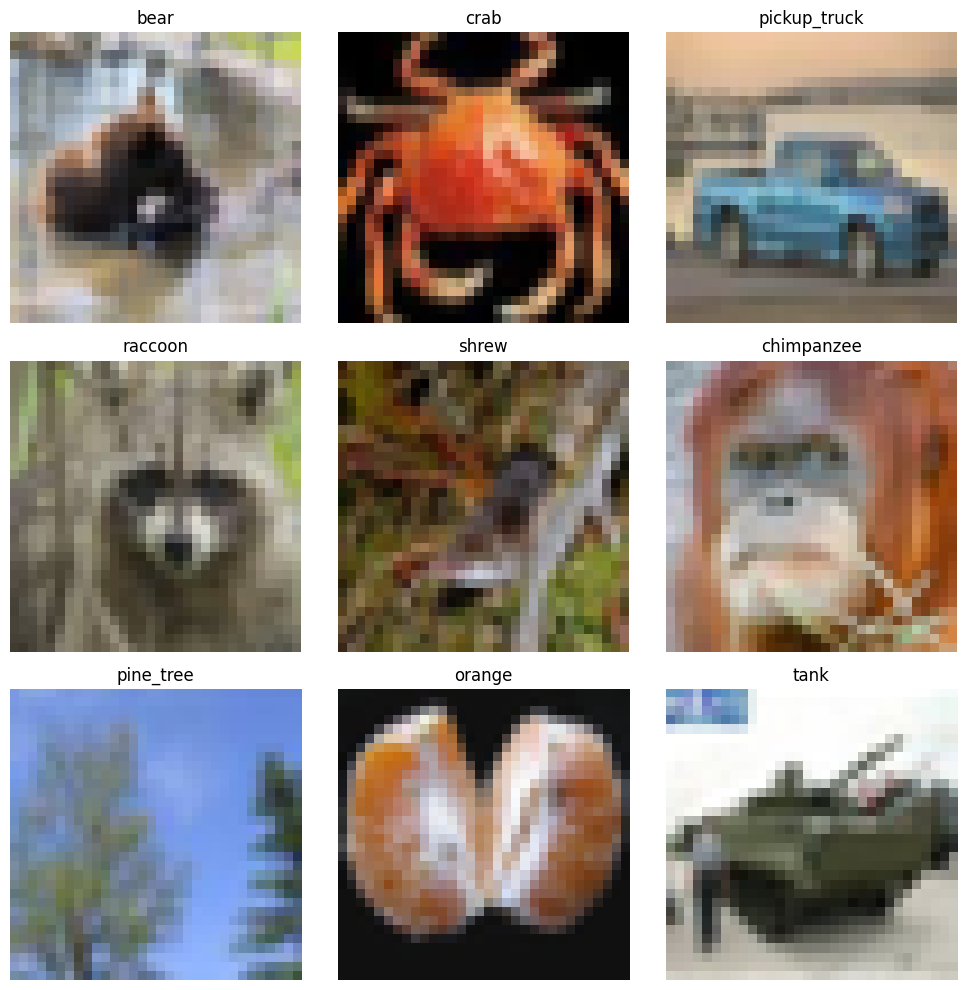

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Class name from the website
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

x_train = x_train.astype(np.uint64)
x_test = x_test.astype(np.uint64)


# function to print the pictures
def plot_images(images, labels, class_names, num_rows=3, num_cols=3):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(num_rows * num_cols):
        index = np.random.randint(0, len(images))
        axes[i].imshow(images[index])
        axes[i].set_title(class_names[labels[index][0]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Print from some randoms pictures
plot_images(x_train, y_train, class_names)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the shape of the dataset
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Define the CNN model function
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define cross-validation parameters
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
i=1
# Perform cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    # Split train and validation sets
    print("test : ",i)
    i+=1
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train a new model for each fold
    model = create_model()
    history = model.fit(x_train_fold, y_train_fold, epochs=2, batch_size=64,
                        validation_data=(x_val_fold, y_val_fold), verbose=0)
    # Evaluate the model on the validation set for this fold
    _, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    cv_scores.append(acc)

# Print average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f}")


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
test :  1
test :  2
test :  3
test :  4
test :  5
Average cross-validation accuracy: 0.1908 +/- 0.0086


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the shape of the dataset
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Define the CNN model function
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
    
    ])
    model.compile(optimizer='RMSprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define cross-validation parameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = []
i=1
# Perform cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    # Split train and validation sets
    print(f'test : {i}')
    i+=1
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train a new model for each fold
    model = create_model()
    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64,
                        validation_data=(x_val_fold, y_val_fold), verbose=0)
    # Evaluate the model on the validation set for this fold
    _, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    cv_scores.append(acc)
    print(f'the cross-validtaion of the test number {i} is {acc}')


# Print average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f}")



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
0
1
Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.0357 - loss: 4.3874 - val_accuracy: 0.1091 - val_loss: 3.8881
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.1205 - loss: 3.7898 - val_accuracy: 0.1549 - val_loss: 3.5593
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.1737 - loss: 3.4815 - val_accuracy: 0.2000 - val_loss: 3.3174
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.2139 - loss: 3.2367 - val_accuracy: 0.2043 - val_loss: 3.3241
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.2556 - loss: 3.0405 - val_accuracy: 0.2580 - val_loss: 3.0029
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.2853 - loss: 2.8779 - val_accuracy: 0.2659 - val_loss: 2.9911
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.3106 - loss: 2.7380 - val_accu

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the shape of the dataset
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Define the CNN model function
def create_model():
    model = tf.keras.models.Sequential([ 
        layers.Conv2D(16, (3, 3), activation='relu', 
                      input_shape=(32, 32, 3), padding='same'), 
        layers.Conv2D(32, (3, 3), 
                   activation='relu', 
                  padding='same'), 
        layers.Conv2D(64, (3, 3), 
                    activation='relu', 
                    padding='same'), 
        layers.MaxPooling2D(2, 2), 
        layers.Conv2D(128, (3, 3), 
                    activation='relu', 
                    padding='same'), 
    
    
        layers.Flatten(), 
        layers.Dense(256, activation='relu'), 
        layers.BatchNormalization(), 
        layers.Dense(256, activation='relu'), 
        layers.Dropout(0.3), 
        layers.BatchNormalization(), 
        layers.Dense(100, activation='softmax') 
]) 
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define cross-validation parameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = []
i=1
# Perform cross-validation
for train_index, val_index in kfold.split(x_train, y_train):
    # Split train and validation sets
    print(f'test : {i}')
    i+=1
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train a new model for each fold
    model = create_model()
    history = model.fit(x_train_fold, y_train_fold, epochs=2, batch_size=64,
                        validation_data=(x_val_fold, y_val_fold), verbose=1)
    # Evaluate the model on the validation set for this fold
    _, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    cv_scores.append(acc)
    print(f'the cross-validtaion of the test number {i} is {acc}')


# Print average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(cv_scores):.4f} +/- {np.std(cv_scores):.4f}")



x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
test : 1
Epoch 1/2
419/521 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.0426 - loss: 4.6476

KeyboardInterrupt: 